## Import stuff, including UK gov Cov19API

In [700]:
from uk_covid19 import Cov19API
import matplotlib.pyplot as plt
import pandas as pd

In [701]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Load data using API

In [702]:
england_only = [
    'areaType=nation',
    'areaName=England'
]

none = ['areaType=overview']

cases_and_deaths = {
    "date":"date",
    "areaName":"areaName",
    "areaCode":"areaCode",
    "CasesByPublishDate":"newCasesByPublishDate",
    "CasesBySpecimenDate":"newCasesBySpecimenDate",
    "DeathsByDeathDate":"newDeaths28DaysByDeathDate"
}

api = Cov19API(filters=none, structure=cases_and_deaths)
data = api.get_json()  # Returns a dictionary

data_df = pd.DataFrame(data['data'])  # Change to dataframe
data_df = data_df.set_index('date').sort_index().reset_index()
data_df['date'] = pd.to_datetime(data_df['date'])

In [703]:
data_df

,date,areaName,areaCode,CasesByPublishDate,CasesBySpecimenDate,DeathsByDeathDate
0,2020-01-30,United Kingdom,K02000001,NaN,2.0,NaN
1,2020-01-31,United Kingdom,K02000001,2.0,0.0,NaN
2,2020-02-01,United Kingdom,K02000001,0.0,0.0,NaN
3,2020-02-02,United Kingdom,K02000001,0.0,0.0,NaN
4,2020-02-03,United Kingdom,K02000001,0.0,0.0,NaN
...,...,...,...,...,...,...
539,2021-07-22,United Kingdom,K02000001,39906.0,30265.0,50.0
540,2021-07-23,United Kingdom,K02000001,36389.0,26440.0,35.0
541,2021-07-24,United Kingdom,K02000001,31795.0,19982.0,12.0
542,2021-07-25,United Kingdom,K02000001,29173.0,6655.0,3.0


In [704]:
print('Last update: {0}'.format(data['lastUpdate']))

Last update: 2021-07-26T16:15:08.000000Z


## Plot cases

<AxesSubplot:xlabel='date'>

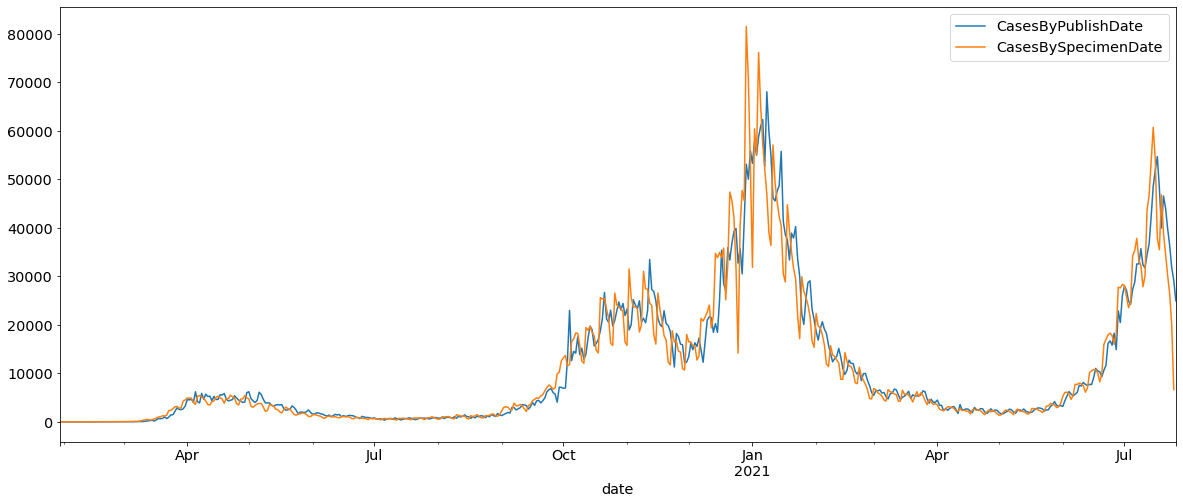

In [705]:
fig, ax = plt.subplots(1, 1)
    
data_df.plot(x='date', y='CasesByPublishDate', ax=ax)
data_df.plot(x='date', y='CasesBySpecimenDate', ax=ax)


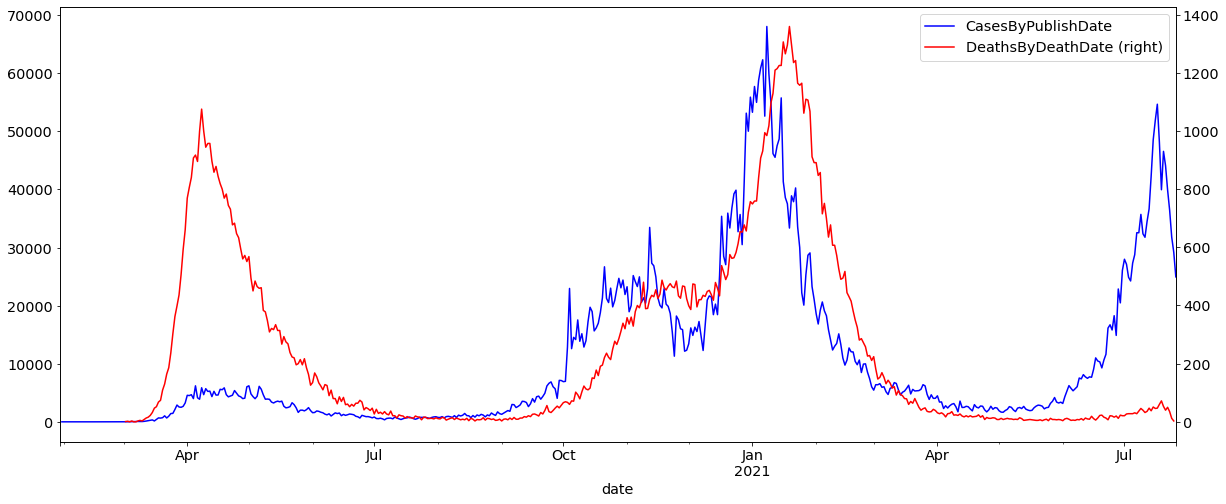

In [706]:
fig, ax = plt.subplots(1, 1)
    
plt1 = data_df.plot(x='date', y='CasesByPublishDate', ax=ax, c='b')
plt2 = data_df.plot(x='date', y='DeathsByDeathDate', ax=ax, c='r', secondary_y=True)


## Shift deaths

In [707]:
lag = 12
data_df['DeathsByDeathDateShifted'] = data_df['DeathsByDeathDate'].shift(-lag)

Text(0.5, 1.0, 'Deaths (12 days previous) / Cases')

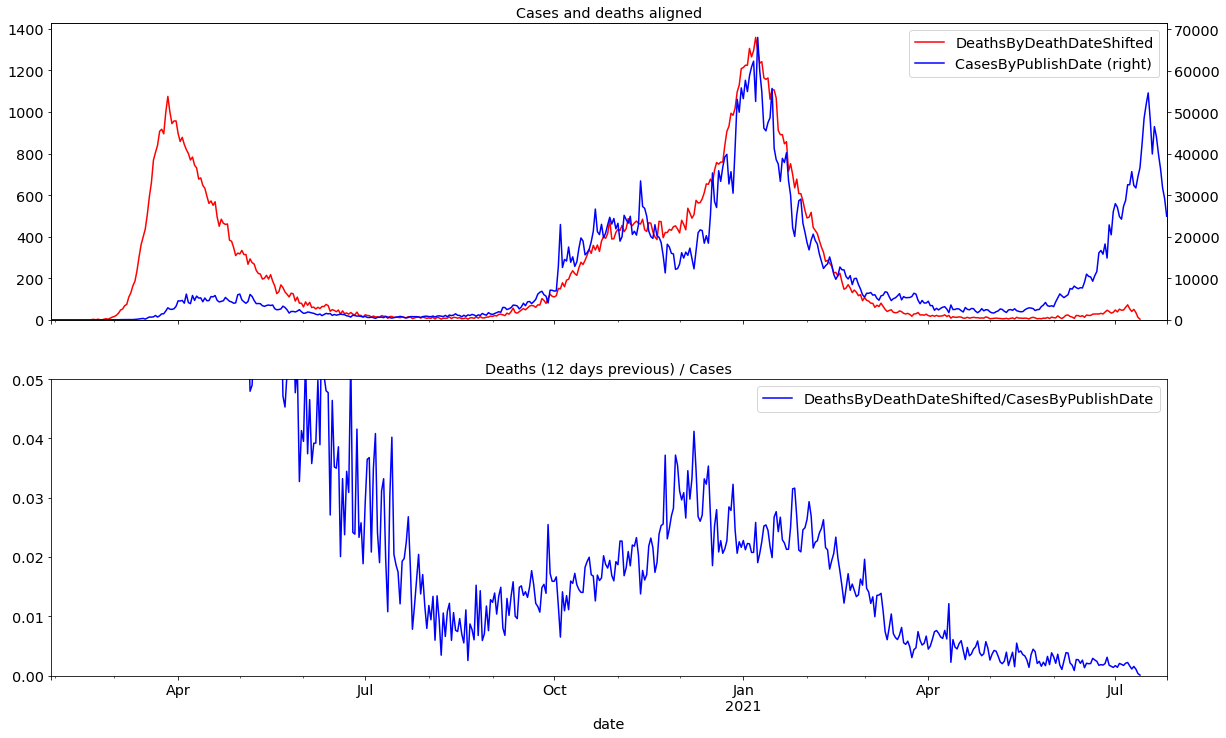

In [710]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 12))

ax1.set_xlim(np.min(data_df['date']), np.max(data_df['date']))

ax1.set_title('Cases and deaths aligned')

plt1 = data_df.plot(x='date', y='DeathsByDeathDateShifted', ax=ax1, c='r')
plt2 = data_df.plot(x='date', y='CasesByPublishDate', ax=ax1, c='b', secondary_y=True)

plt1.set_ylim(0)
plt2.set_ylim(0)

data_df['DeathsByDeathDateShifted/CasesByPublishDate'] = data_df['DeathsByDeathDateShifted'] / data_df['CasesByPublishDate']

plt3 = data_df.plot(x='date', y='DeathsByDeathDateShifted/CasesByPublishDate', ax=ax2, c='b')
plt3.set_ylim(0, 0.05)
plt3.set_title('Deaths ({0} days previous) / Cases'.format(int(lag)))